# Plotting With Pandas (and matplotlib)

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
titanic = pd.read_csv("data/titanic.csv")
titanic["age"] = pd.to_numeric(titanic["age"], errors="coerce")

In [85]:
houses = pd.read_csv("data/kc_house_data.csv")

In [86]:
ufos = pd.read_csv("data/nuforc_reports.csv", parse_dates=['date_time', "posted"])

In [87]:
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

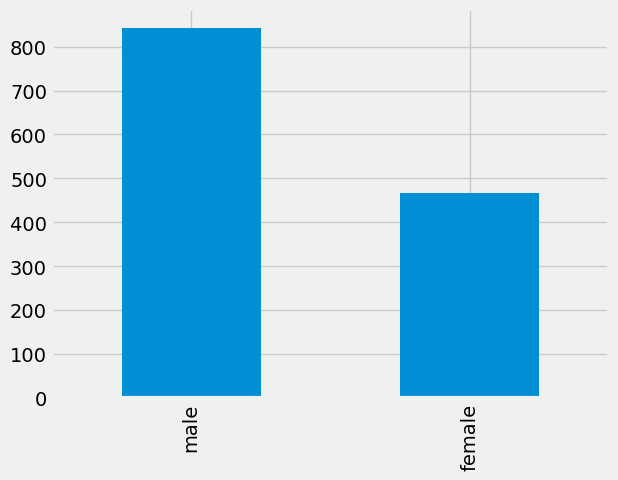

In [88]:
titanic.sex.value_counts().plot(kind="bar");

In [89]:
houses[["sqft_living", "sqft_lot"]].sort_values("sqft_living", ascending=False).head(10)

,sqft_living,sqft_lot
12777,13540,307752
7252,12050,27600
3914,10040,37325
9254,9890,31374
8092,9640,13068
4411,9200,35069
14556,8670,64033
18302,8020,21738
1164,8010,45517
1448,8000,23985


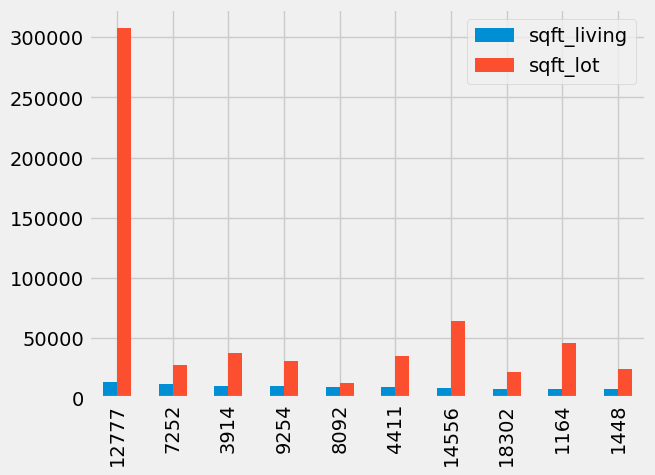

In [90]:
houses[["sqft_living", "sqft_lot"]].sort_values("sqft_living", ascending=False).head(10).plot(kind="bar");

In [91]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

### Change the ploting style here

In [92]:
plt.style.use("fivethirtyeight")

<Axes: >

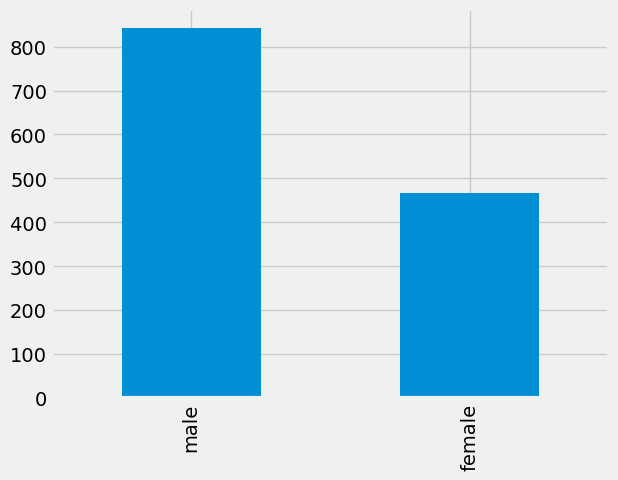

In [93]:
titanic.sex.value_counts().plot(kind="bar")

## Change the Title

<Axes: title={'center': 'Sex Breakdown On Titanic'}>

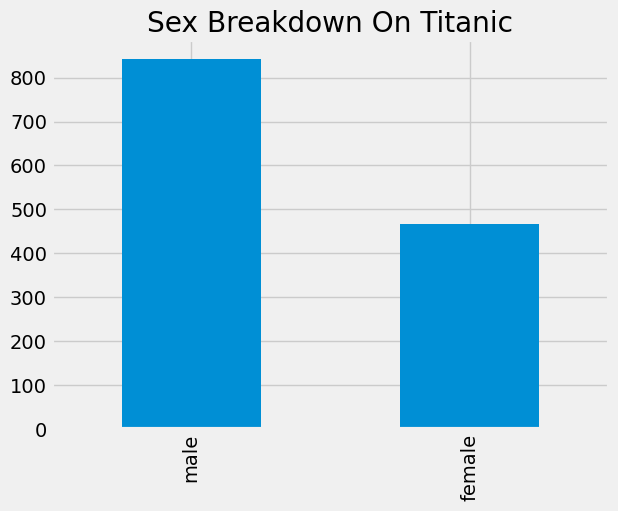

In [94]:
titanic.sex.value_counts().plot(kind="bar", title="Sex Breakdown On Titanic")

Text(1.0, 1.0, 'My Title')

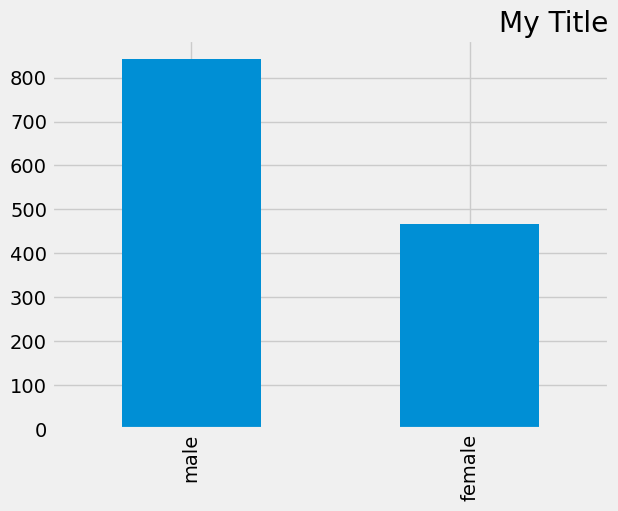

In [95]:
titanic.sex.value_counts().plot(kind="bar")
plt.title("My Title", loc="right")

In [96]:
ufos["month"] = ufos["date_time"].dt.month
ufos["year"] = ufos["date_time"].dt.year

<Axes: title={'center': 'UFO Sightings By Month'}, xlabel='Month', ylabel='Num Sightings'>

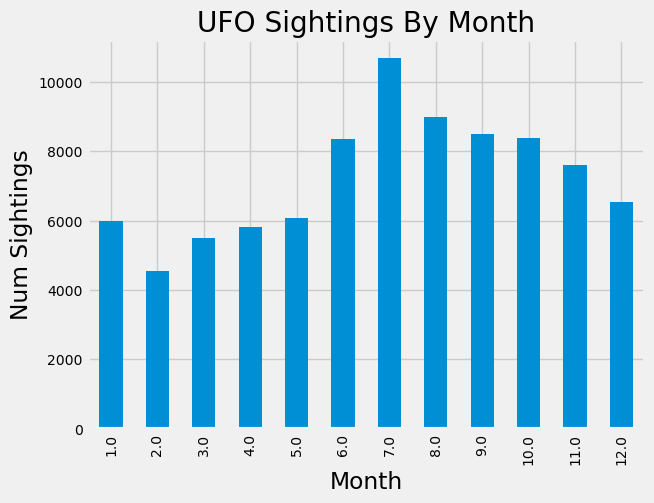

In [97]:
sightings = ufos.month.value_counts().sort_index()
sightings.plot(
    kind="bar", 
    title="UFO Sightings By Month", 
    xlabel="Month",
    ylabel="Num Sightings",
    fontsize="10")

Text(0, 0.5, 'Num Sightings')

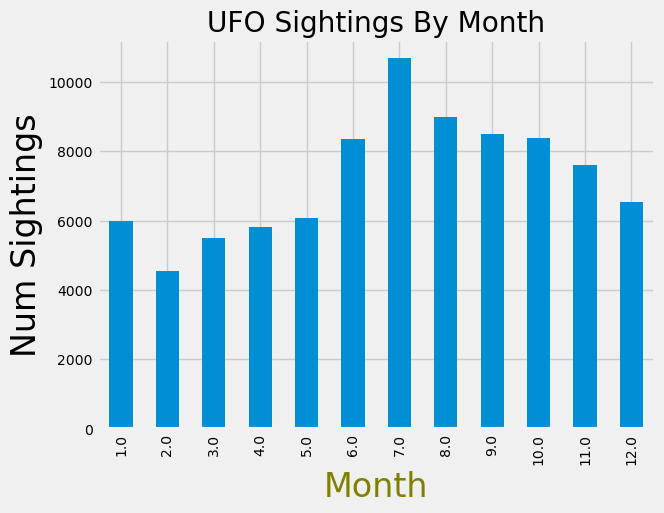

In [98]:
sightings = ufos.month.value_counts().sort_index()
sightings.plot(
    kind="bar", 
    title="UFO Sightings By Month", 
    fontsize="10")

# Change the color & font's
plt.xlabel("Month", fontsize=24, color="olive")
plt.ylabel("Num Sightings", fontsize=24)

Text(0, 0.5, 'Num Sightings')

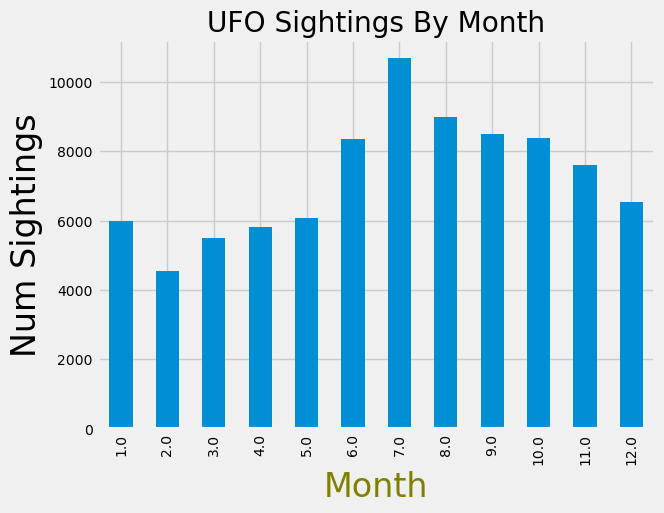

In [99]:
sightings = ufos.month.value_counts().sort_index()
sightings.plot(
    kind="bar", 
    title="UFO Sightings By Month", 
    fontsize="10")


plt.xlabel("Month", fontsize=24, color="olive")
plt.ylabel("Num Sightings", fontsize=24)

In [100]:
sightings

1.0      5979
2.0      4559
3.0      5494
4.0      5817
5.0      6063
6.0      8357
7.0     10682
8.0      8997
9.0      8498
10.0     8371
11.0     7596
12.0     6525
Name: month, dtype: int64

## Rename dictinory

In [101]:
months_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7:"Jul", 8: "Aug", 9:"Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
sightings.rename(months_dict)

Jan     5979
Feb     4559
Mar     5494
Apr     5817
May     6063
Jun     8357
Jul    10682
Aug     8997
Sep     8498
Oct     8371
Nov     7596
Dec     6525
Name: month, dtype: int64

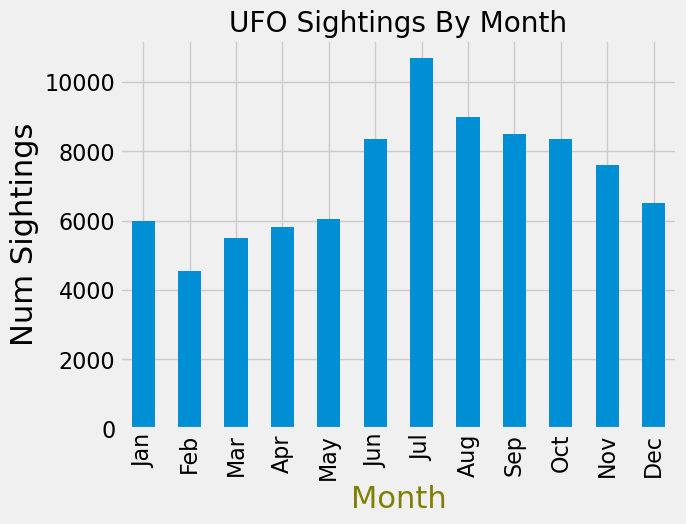

In [102]:
sightings.rename(months_dict).plot(
    kind="bar", 
    title="UFO Sightings By Month", 
    fontsize="16")
plt.xlabel("Month", fontsize=22, color="olive")
plt.ylabel("Num Sightings", fontsize=22);

In [103]:
salaries = pd.read_csv("data/Salaries.csv", low_memory=False)

In [104]:
salaries["BasePay"] = pd.to_numeric(salaries["BasePay"], errors="coerce").fillna(0)
salaries["OvertimePay"] = pd.to_numeric(salaries["OvertimePay"], errors="coerce").fillna(0)
salaries["OtherPay"] = pd.to_numeric(salaries["OtherPay"], errors="coerce").fillna(0)

In [105]:
df = salaries[["EmployeeName", "BasePay", "OvertimePay", "OtherPay"]]

In [106]:
df.set_index("EmployeeName", inplace=True)

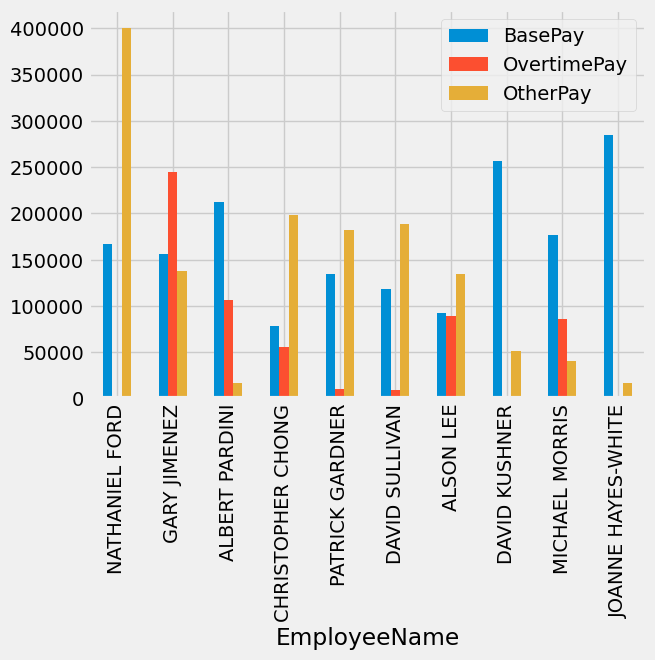

In [107]:
df.head(10).plot(kind="bar");

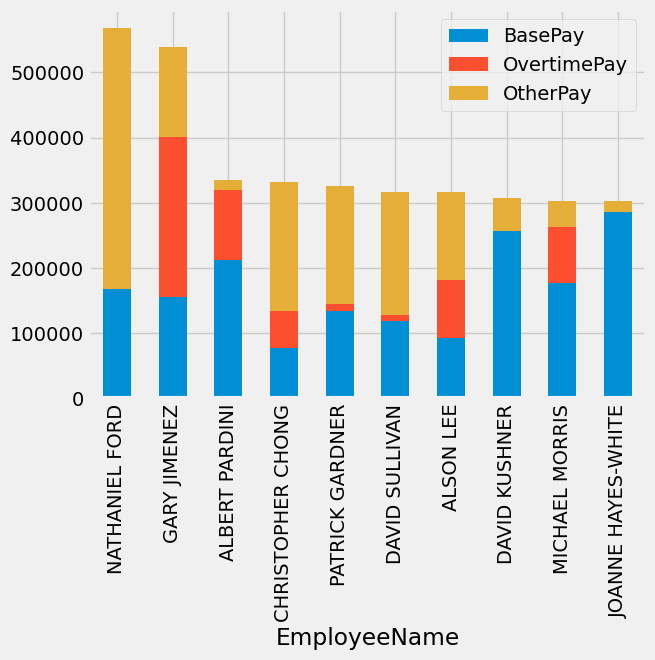

In [108]:
df.head(10).plot(kind="bar", stacked=True);

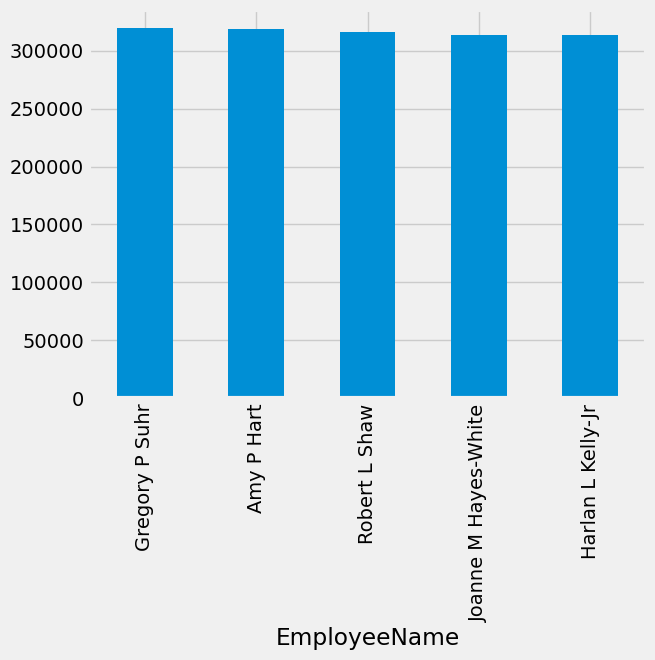

In [109]:
df["BasePay"].sort_values(ascending=False).head().plot(kind="bar");

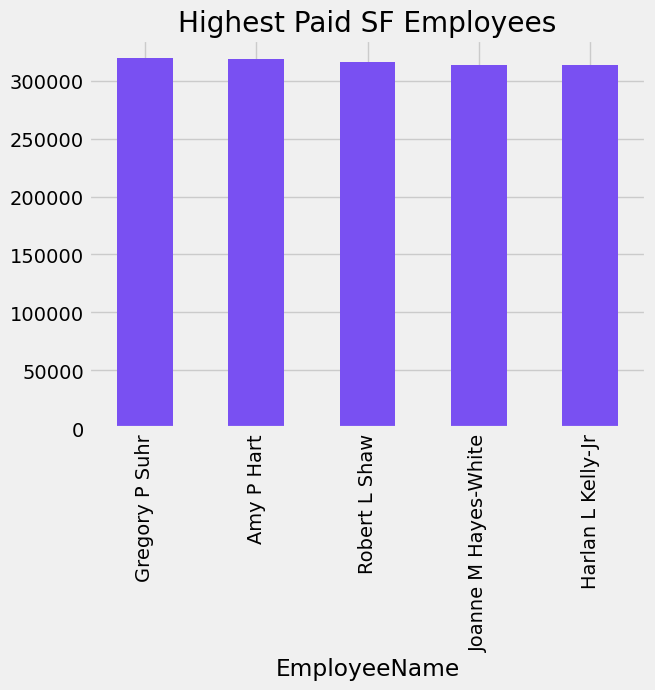

In [110]:
df["BasePay"].sort_values(ascending=False).head().plot.bar(color="#7950f2", title="Highest Paid SF Employees");

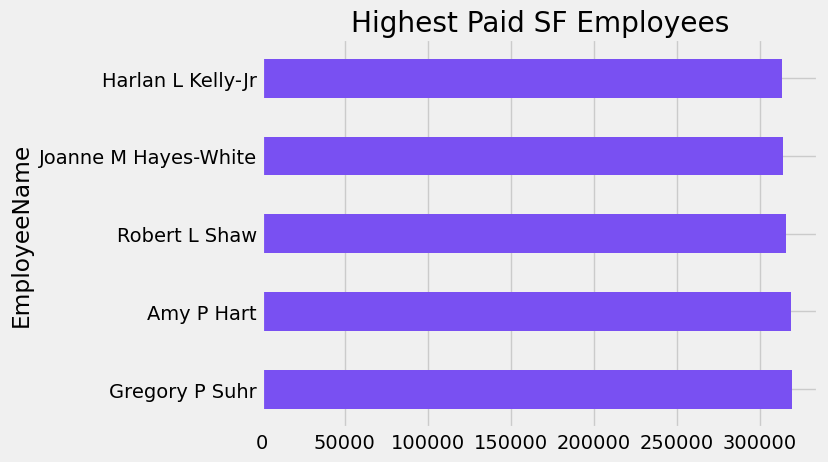

In [111]:
df["BasePay"].sort_values(ascending=False).head().plot.barh(color="#7950f2", title="Highest Paid SF Employees");

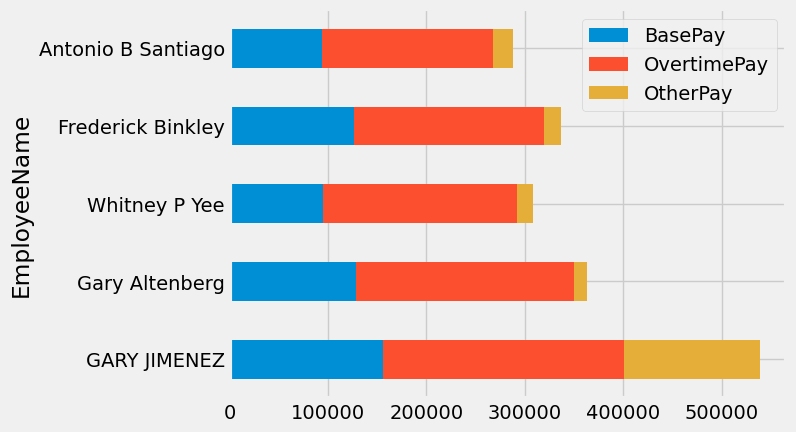

In [112]:
df.sort_values("OvertimePay", ascending=False).head().plot(kind="barh", stacked=True);

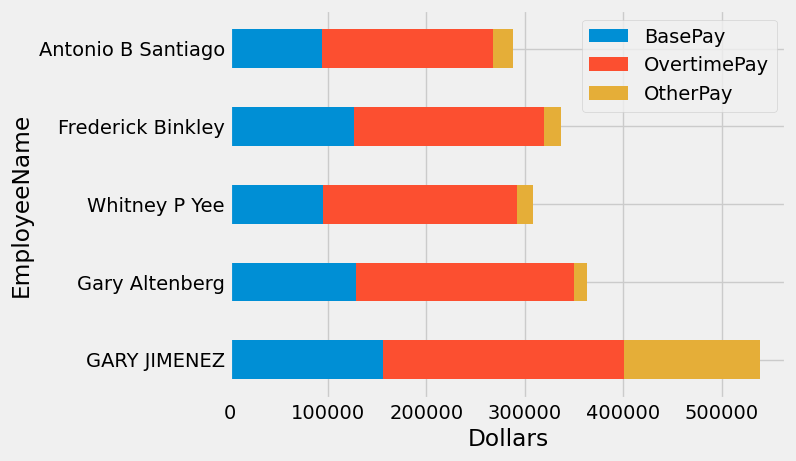

In [113]:
df.sort_values("OvertimePay", ascending=False).head().plot.barh(stacked=True)
plt.xlabel("Dollars");

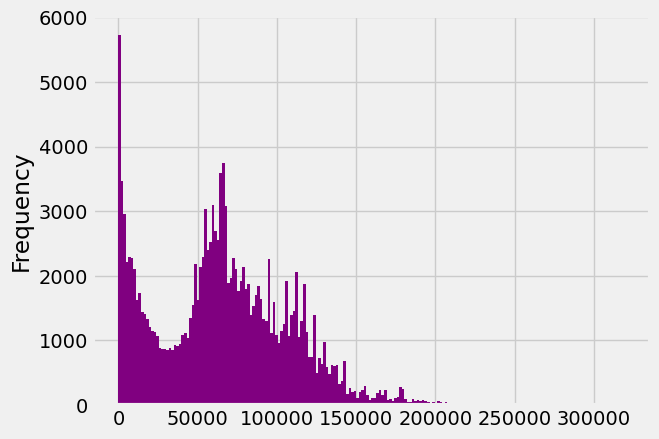

In [114]:
df["BasePay"].plot(kind="hist", bins=200, color="purple");

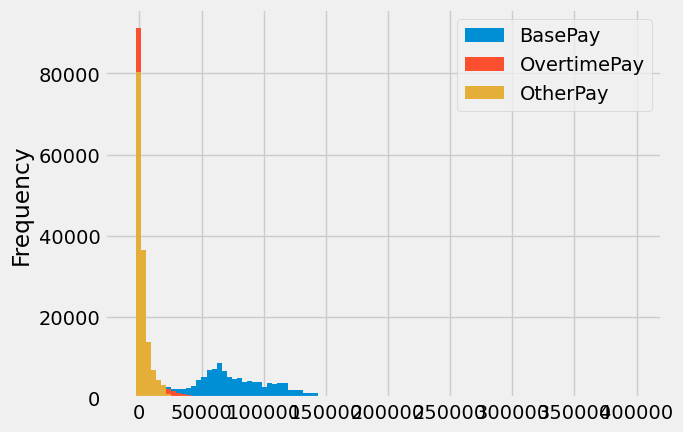

In [115]:
df.plot(kind="hist", bins=100);

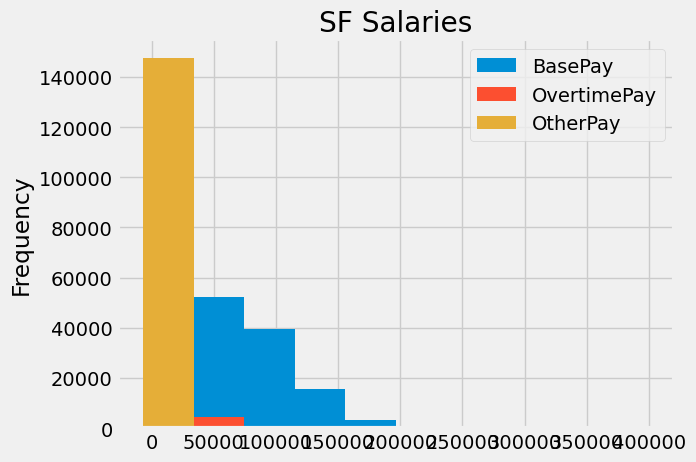

In [116]:
df.plot.hist(title="SF Salaries");

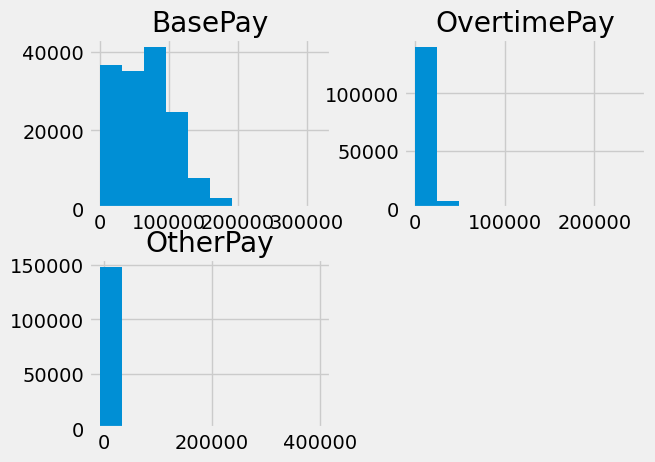

In [117]:
df.hist();

# Box Plots

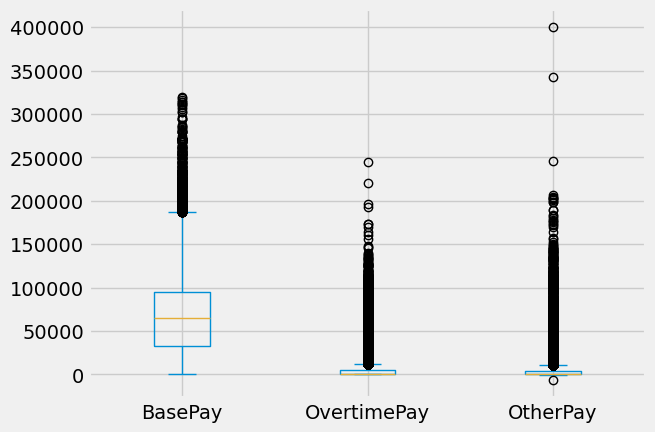

In [118]:
df.plot(kind="box");

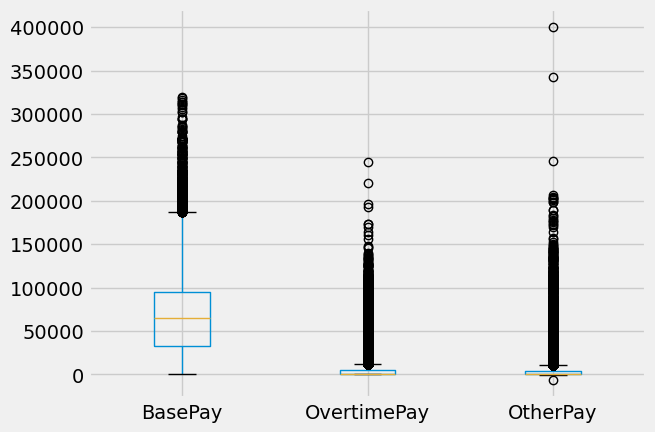

In [119]:
df.boxplot();

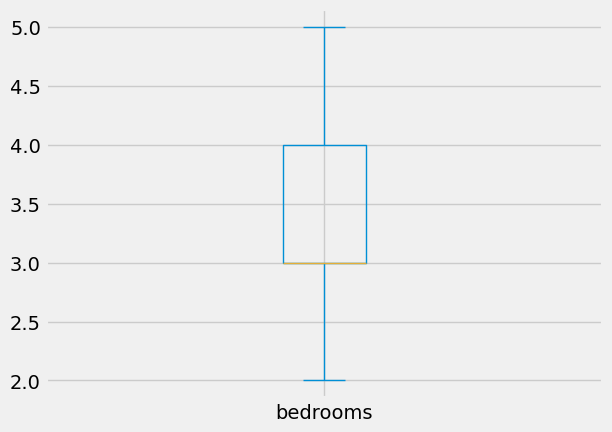

In [150]:
houses.bedrooms.plot(kind="box", showfliers=False);

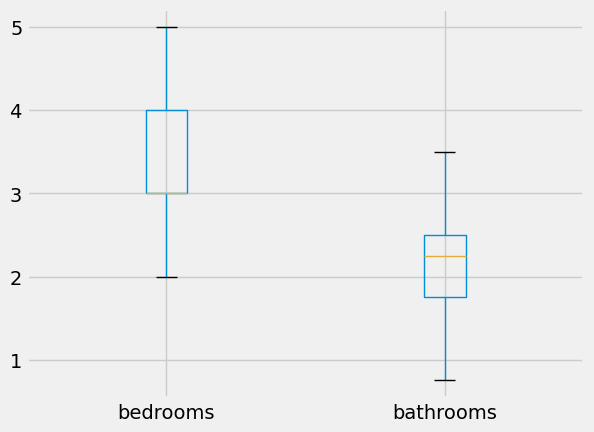

In [121]:
houses[["bedrooms", "bathrooms"]].boxplot(showfliers=False);

# Line Plots

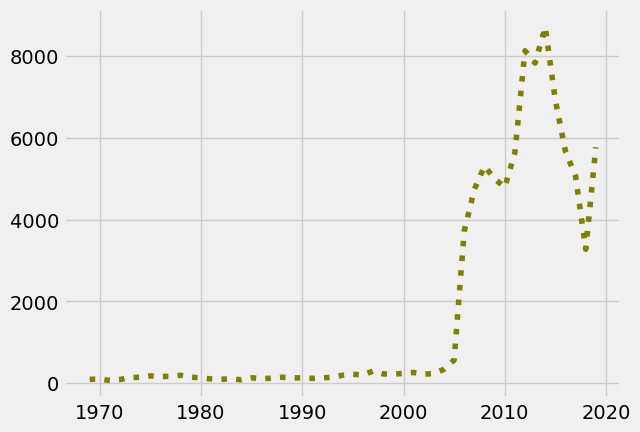

In [122]:
ufos.year.value_counts().sort_index().plot(kind="line", color="olive", linestyle=":");

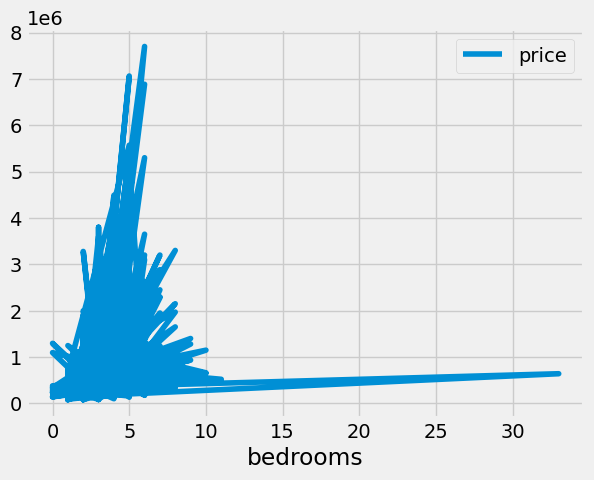

In [123]:
houses.plot.line(x="bedrooms", y="price");

## Scatter Plots

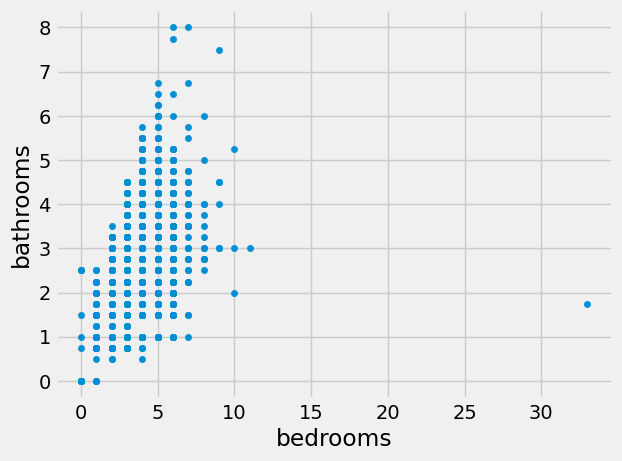

In [124]:
houses.plot.scatter(x="bedrooms", y="bathrooms");

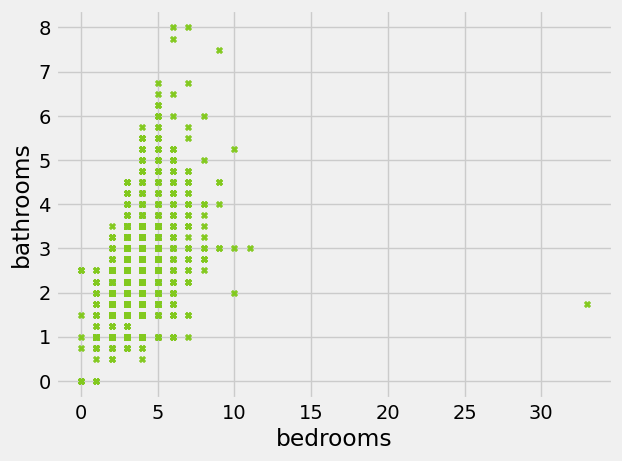

In [160]:
houses.plot.scatter(x="bedrooms", y="bathrooms", marker="X", color="#82c91e");

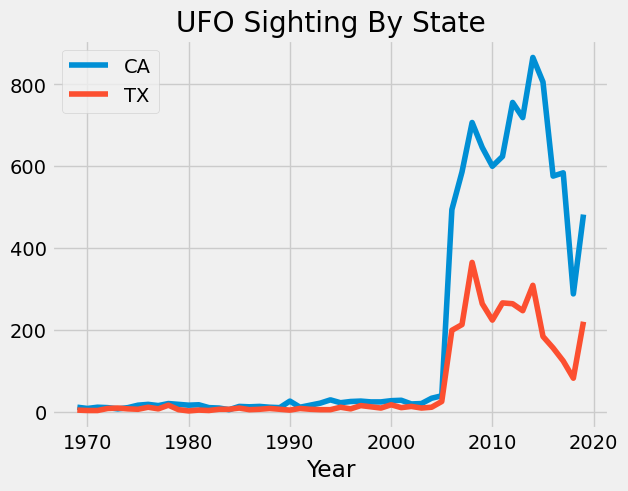

In [162]:
ufos[ufos["state"] == "CA"].year.value_counts().sort_index().plot(label="CA")
ufos[ufos["state"] == "TX"].year.value_counts().sort_index().plot(label="TX")
plt.legend(loc="upper left")
plt.title("UFO Sighting By State")
plt.xlabel("Year");

In [127]:
ufos["shape"].value_counts()

light        18230
circle       10130
triangle      7910
fireball      7095
unknown       6182
sphere        6065
other         5749
disk          4522
oval          3857
formation     2842
changing      2112
cigar         1990
flash         1675
rectangle     1597
cylinder      1374
diamond       1273
chevron        953
teardrop       767
egg            666
cone           349
cross          289
Name: shape, dtype: int64

Text(0.5, 0, 'Year')

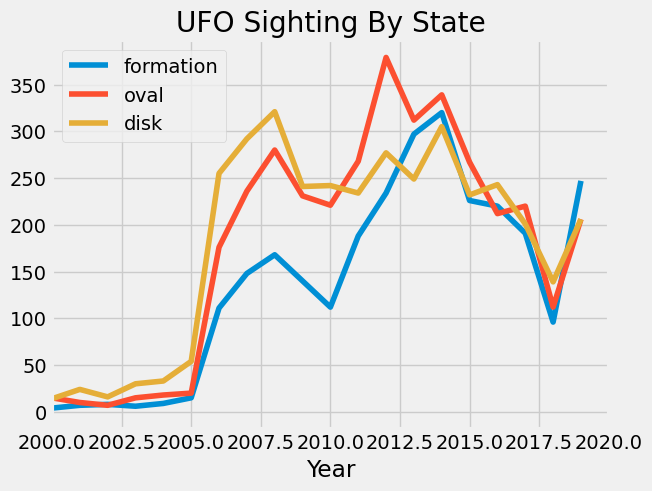

In [128]:
ufos[ufos["shape"] == "formation"].year.value_counts().sort_index().plot(label="formation")
ufos[ufos["shape"] == "oval"].year.value_counts().sort_index().plot(label="oval")
# ufos[ufos["shape"] == "light"].year.value_counts().sort_index().plot(label="light")
# ufos[ufos["shape"] == "circle"].year.value_counts().sort_index().plot(label="circle")
# ufos[ufos["shape"] == "fireball"].year.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"] == "disk"].year.value_counts().sort_index().plot(label="disk")
plt.xlim(2000,2020)
plt.legend(loc="upper left")
plt.title("UFO Sighting By State")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

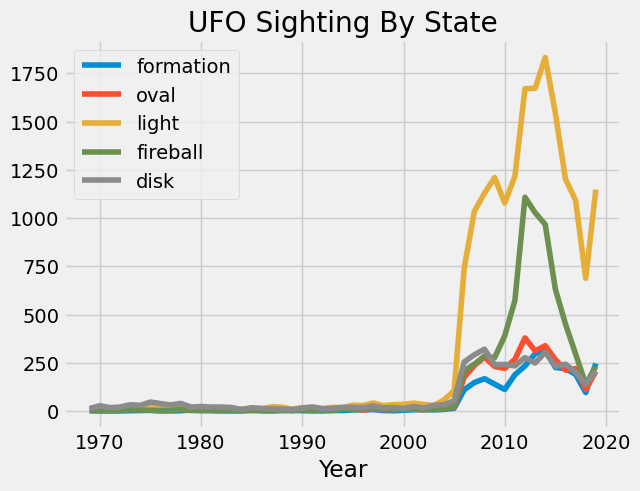

In [129]:
ufos[ufos["shape"] == "formation"].year.value_counts().sort_index().plot(label="formation")
ufos[ufos["shape"] == "oval"].year.value_counts().sort_index().plot(label="oval")
ufos[ufos["shape"] == "light"].year.value_counts().sort_index().plot(label="light")
# ufos[ufos["shape"] == "circle"].year.value_counts().sort_index().plot(label="circle")
ufos[ufos["shape"] == "fireball"].year.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"] == "disk"].year.value_counts().sort_index().plot(label="disk")
# plt.xlim(2000,2020)
plt.legend(loc="upper left")
plt.title("UFO Sighting By State")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

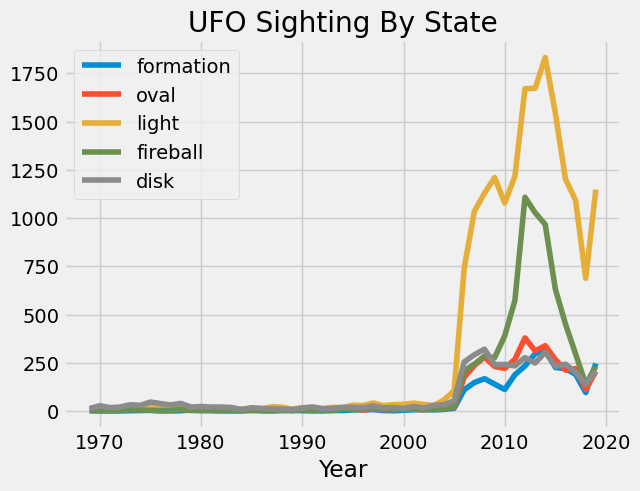

In [130]:
ufos[ufos["shape"] == "formation"].year.value_counts().sort_index().plot(label="formation")
ufos[ufos["shape"] == "oval"].year.value_counts().sort_index().plot(label="oval")
ufos[ufos["shape"] == "light"].year.value_counts().sort_index().plot(label="light")
# ufos[ufos["shape"] == "circle"].year.value_counts().sort_index().plot(label="circle")
ufos[ufos["shape"] == "fireball"].year.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"] == "disk"].year.value_counts().sort_index().plot(label="disk")
# plt.xlim(2000,2020)
plt.legend(loc="upper left")
plt.title("UFO Sighting By State")
plt.xlabel("Year")

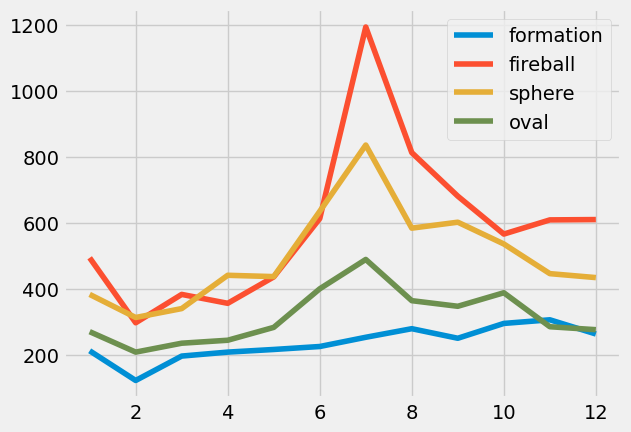

In [131]:
ufos[ufos["shape"] == "formation"].month.value_counts().sort_index().plot(label="formation")
ufos[ufos["shape"] == "fireball"].month.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"] == "sphere"].month.value_counts().sort_index().plot(label="sphere")
ufos[ufos["shape"] == "oval"].month.value_counts().sort_index().plot(label="oval")
plt.legend()

In [132]:
ufos["shape"].value_counts()

light        18230
circle       10130
triangle      7910
fireball      7095
unknown       6182
sphere        6065
other         5749
disk          4522
oval          3857
formation     2842
changing      2112
cigar         1990
flash         1675
rectangle     1597
cylinder      1374
diamond       1273
chevron        953
teardrop       767
egg            666
cone           349
cross          289
Name: shape, dtype: int64

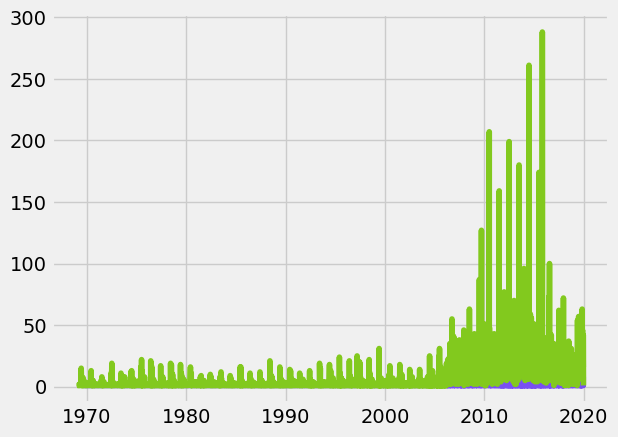

In [156]:
ufos[ufos["shape"] == "formation"].date_time.dt.date.value_counts().sort_index().plot(label="formation", color="#7950f2");
ufos[ufos["shape"] != "formation"].date_time.dt.date.value_counts().sort_index().plot(label="all", color="#82c91e");

(17987.0, 18261.0)

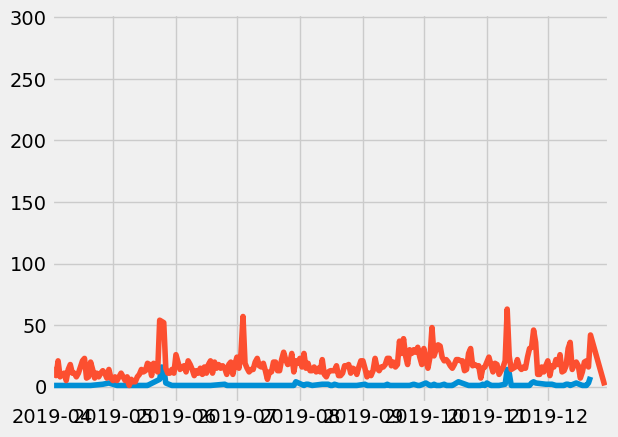

In [134]:
ufos[ufos["shape"] == "formation"].date_time.dt.date.value_counts().sort_index().plot()
# ufos[ufos["shape"] == "cigar"].date_time.dt.date.value_counts().sort_index().plot()
# ufos[ufos["shape"] == "fireball"].date_time.dt.date.value_counts().sort_index().plot()
# ufos[ufos["shape"] == "sphere"].date_time.dt.date.value_counts().sort_index().plot()
# ufos[ufos["shape"] == "sphere"].date_time.dt.date.value_counts().sort_index().plot()
ufos[ufos["shape"] != "formation"].date_time.dt.date.value_counts().sort_index().plot()
plt.xlim("2019-04-01", "2019-12-31")

In [135]:
ufos

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,month,year
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582,12.0,2019.0
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29,41.664800,-72.639300,3.0,2019.0
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaT,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaT,NaN,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18,45.381383,-75.708501,4.0,2019.0
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15 18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18,NaN,NaN,3.0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04,33.414036,-111.920920,10.0,2019.0
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04,37.642200,-93.399600,10.0,2019.0
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04,27.076210,-82.223280,10.0,2019.0
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02 22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04,35.605000,-82.313200,10.0,2019.0


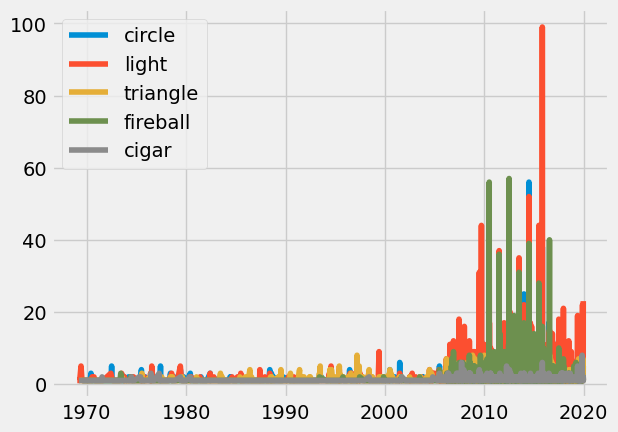

In [163]:
ufos[ufos["shape"] == "circle"].date_time.dt.date.value_counts().sort_index().plot(label="circle")
ufos[ufos["shape"] == "light"].date_time.dt.date.value_counts().sort_index().plot(label="light")
ufos[ufos["shape"] == "triangle"].date_time.dt.date.value_counts().sort_index().plot(label="triangle")
ufos[ufos["shape"] == "fireball"].date_time.dt.date.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"] == "cigar"].date_time.dt.date.value_counts().sort_index().plot(label="cigar")
plt.legend();

(2010.0, 2018.0)

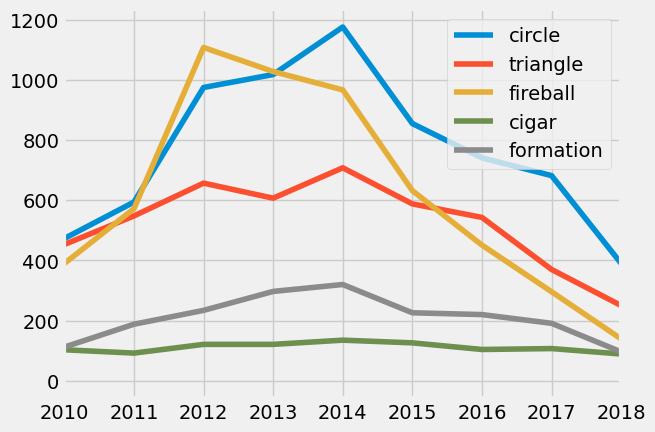

In [137]:
ufos[ufos["shape"] == "circle"].year.value_counts().sort_index().plot(label="circle")
# ufos[ufos["shape"] == "light"].year.value_counts().sort_index().plot(label="light")
ufos[ufos["shape"] == "triangle"].year.value_counts().sort_index().plot(label="triangle")
ufos[ufos["shape"] == "fireball"].year.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"] == "cigar"].year.value_counts().sort_index().plot(label="cigar")
ufos[ufos["shape"] == "formation"].year.value_counts().sort_index().plot(label="formation")
plt.legend()
plt.xlim(2010,2018)


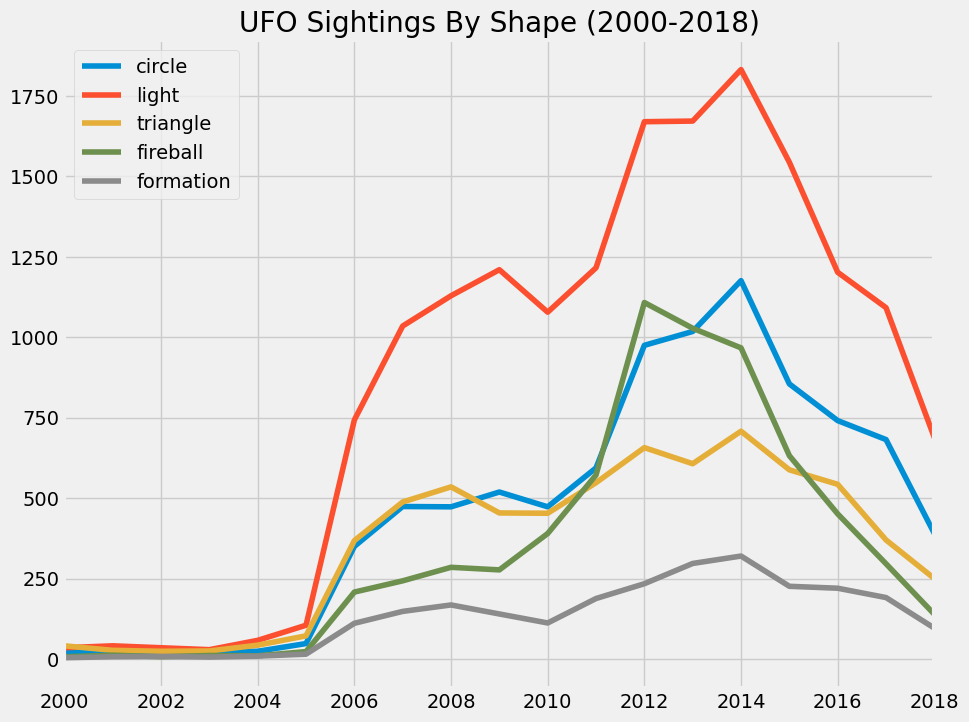

In [165]:
plt.figure(figsize=(10,8))
ufos[ufos["shape"] == "circle"].year.value_counts().sort_index().plot(label="circle")
ufos[ufos["shape"] == "light"].year.value_counts().sort_index().plot(label="light")
ufos[ufos["shape"] == "triangle"].year.value_counts().sort_index().plot(label="triangle")
ufos[ufos["shape"] == "fireball"].year.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"] == "formation"].year.value_counts().sort_index().plot(label="formation")
plt.legend()
plt.xlim(2000,2018)
plt.title("UFO Sightings By Shape (2000-2018)");

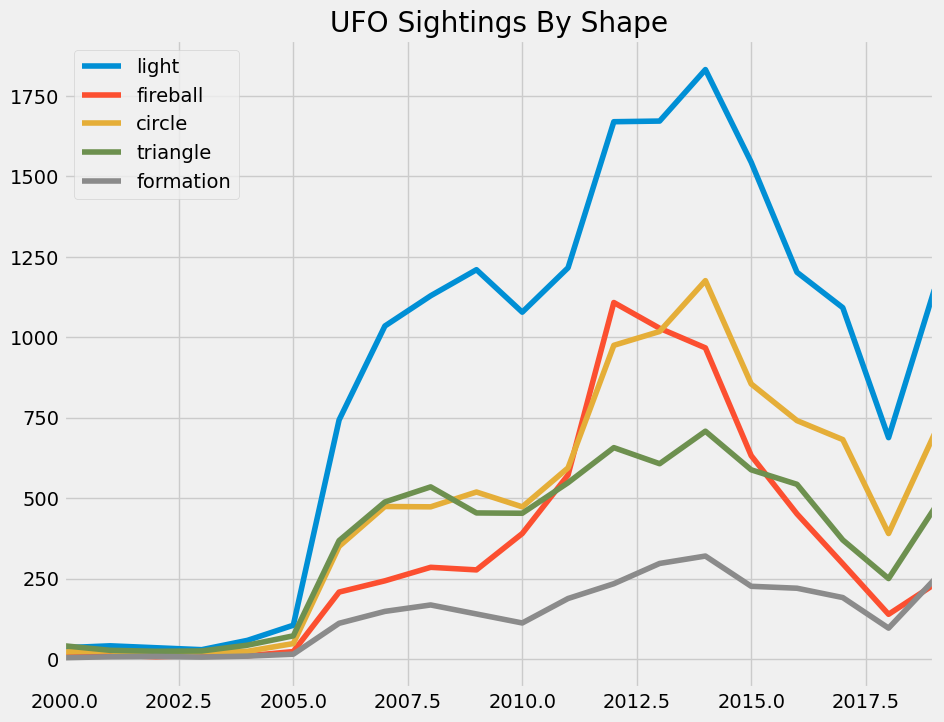

In [164]:
ufos[ufos["shape"] == "light"].year.value_counts().sort_index().plot(label="light", figsize=(10,8), title="UFO Sightings By Shape")
ufos[ufos["shape"] == "fireball"].year.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"] == "circle"].year.value_counts().sort_index().plot(label="circle")
ufos[ufos["shape"] == "triangle"].year.value_counts().sort_index().plot(label="triangle")
ufos[ufos["shape"] == "formation"].year.value_counts().sort_index().plot(label="formation")

plt.xlim(2000, 2019)
plt.legend();

## Subplots

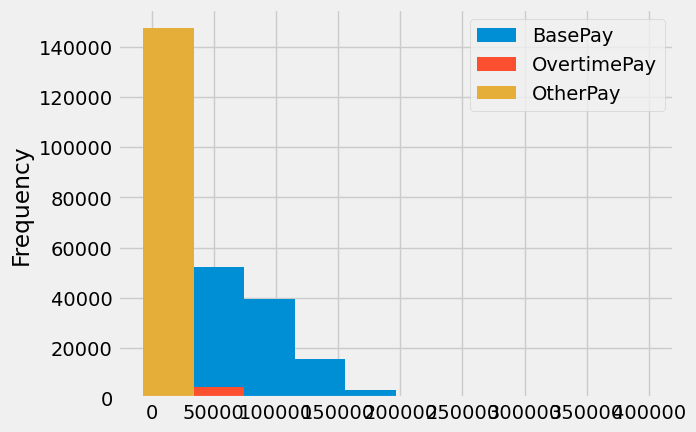

In [166]:
df.plot(kind="hist");

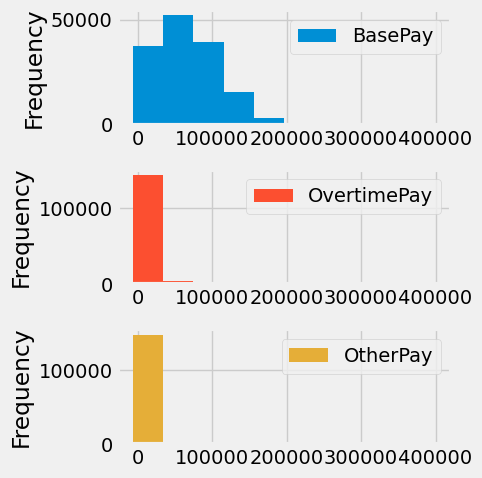

In [174]:
df.plot(kind="hist", subplots=True, sharex=False,figsize=(5,5))
plt.tight_layout();

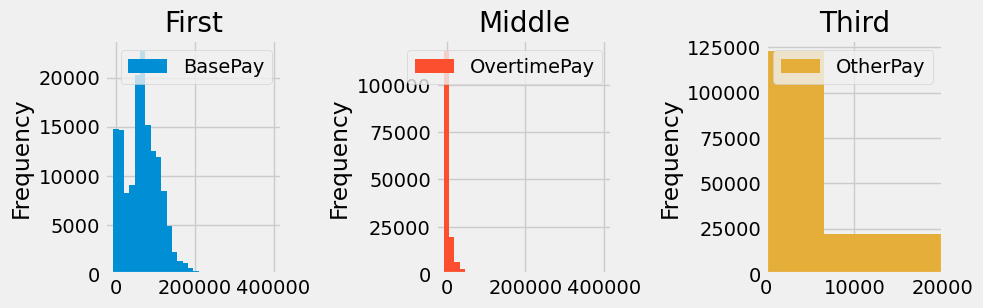

In [178]:
axs = df.plot(kind="hist", subplots=True, sharex=False, layout=(1,3), figsize=(10,3), bins=30)
plt.tight_layout()
axs[0][2].set_xlim(0,20000)
axs[0][1].set_title("Middle")
axs[0][0].set_title("First")
axs[0][2].set_title("Third");

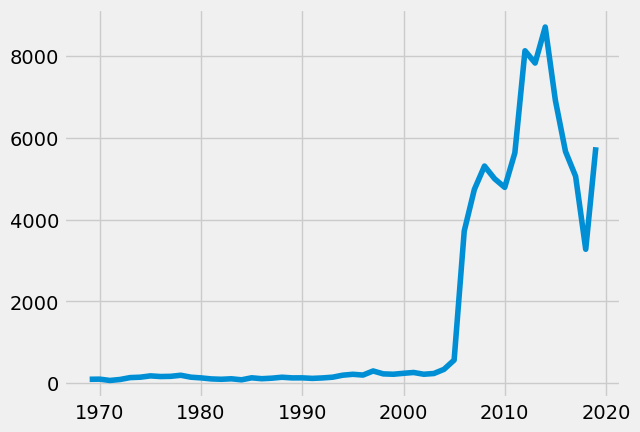

In [171]:
ufos.year.value_counts().sort_index().plot();

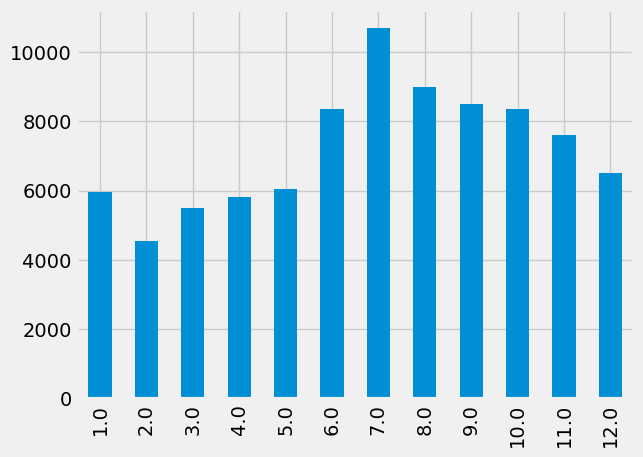

In [172]:
ufos.month.value_counts().sort_index().plot(kind="bar");

## Manual Subplots

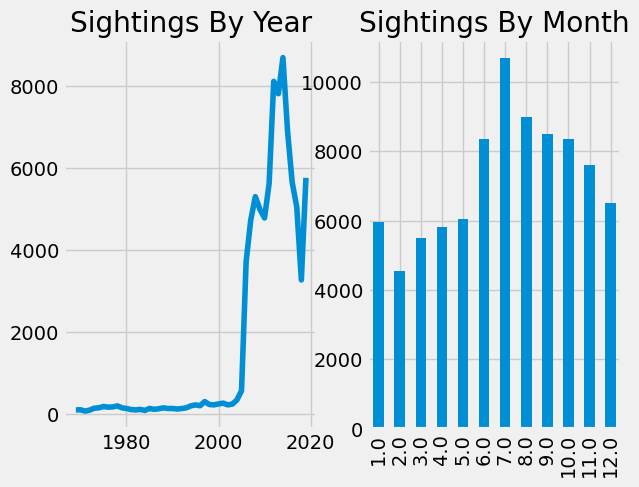

In [179]:
fig, axs = plt.subplots(1,2)
ufos.year.value_counts().sort_index().plot(ax=axs[0])
axs[0].set_title("Sightings By Year")
ufos.month.value_counts().sort_index().plot(kind="bar", ax=axs[1])
axs[1].set_title("Sightings By Month");

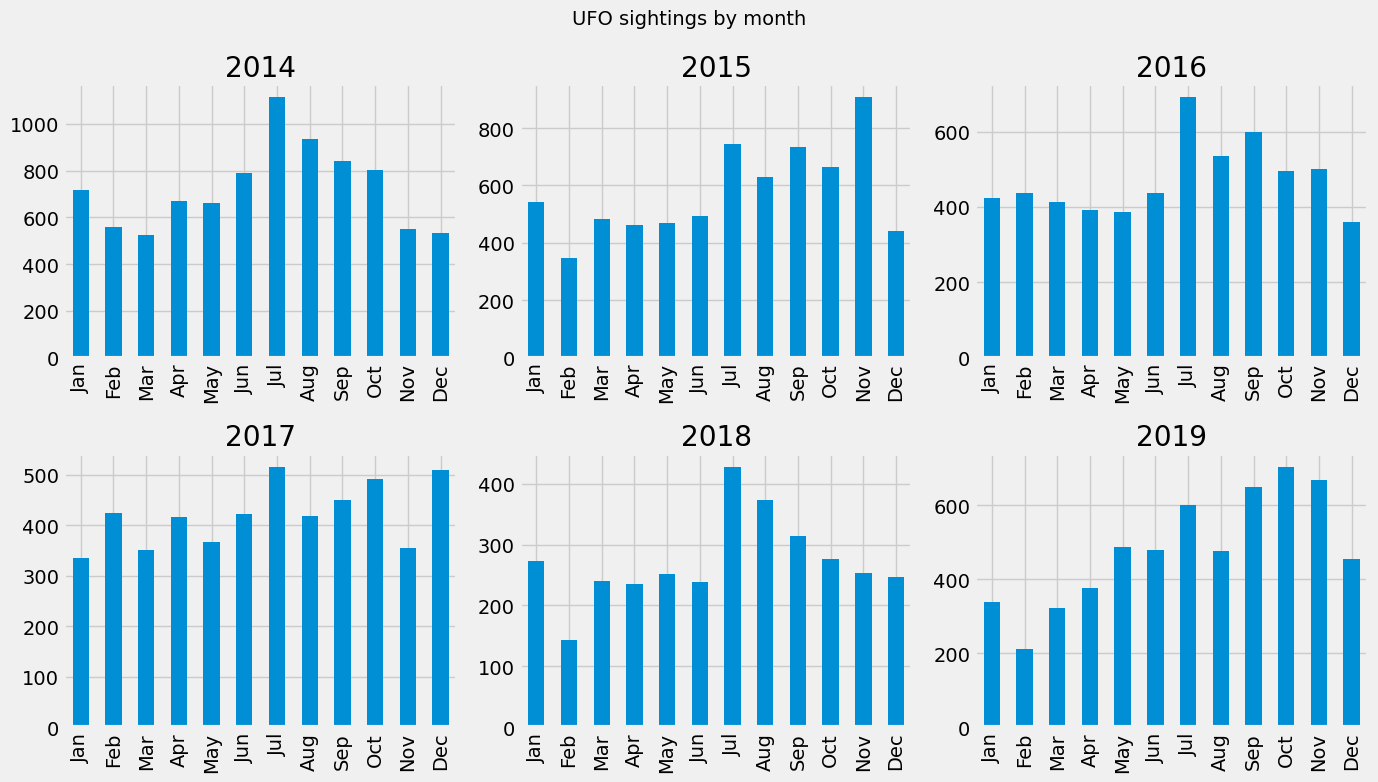

In [180]:
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
          7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

fig, axs = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle("UFO sightings by month", fontsize=14)
fig.tight_layout(pad=2)

ufos[ufos.year == 2014].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][0], title="2014")
ufos[ufos.year == 2015].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][1], title="2015")
ufos[ufos.year == 2016].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][2], title="2016")
ufos[ufos.year == 2017].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][0], title="2017")
ufos[ufos.year == 2018].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][1], title="2018")
ufos[ufos.year == 2019].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][2], title="2019")

plt.tight_layout();

## Savefig()

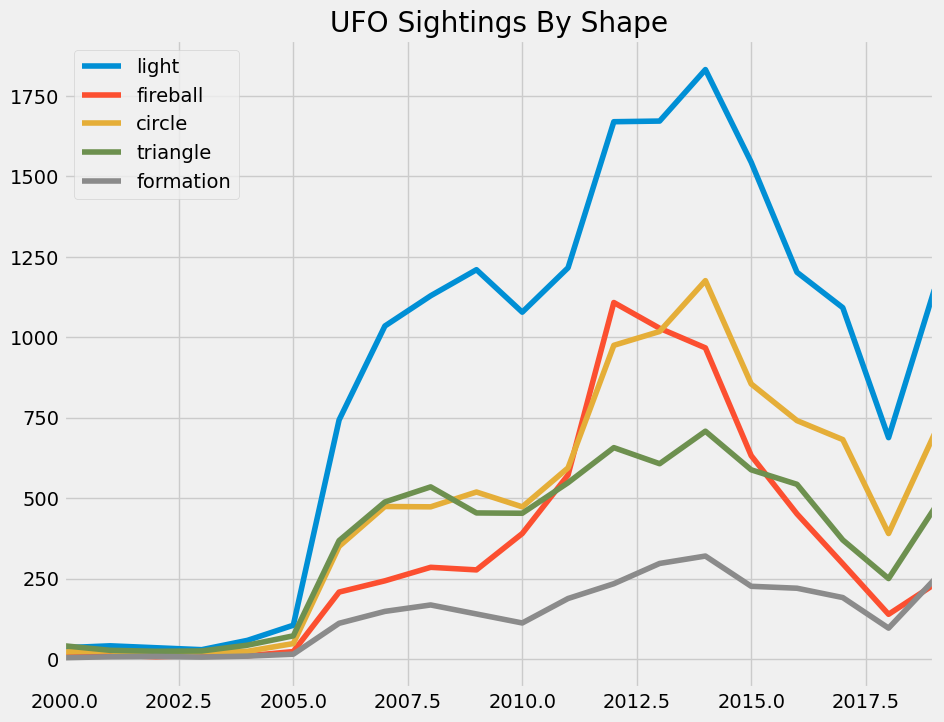

In [186]:
ufos[ufos["shape"] == "light"].year.value_counts().sort_index().plot(label="light", figsize=(10,8), title="UFO Sightings By Shape")

ufos[ufos["shape"] == "fireball"].year.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"] == "circle"].year.value_counts().sort_index().plot(label="circle")
ufos[ufos["shape"] == "triangle"].year.value_counts().sort_index().plot(label="triangle")
ufos[ufos["shape"] == "formation"].year.value_counts().sort_index().plot(label="formation")

plt.xlim(2000, 2019)
plt.legend()
plt.savefig("./image/UFO_Shapes");

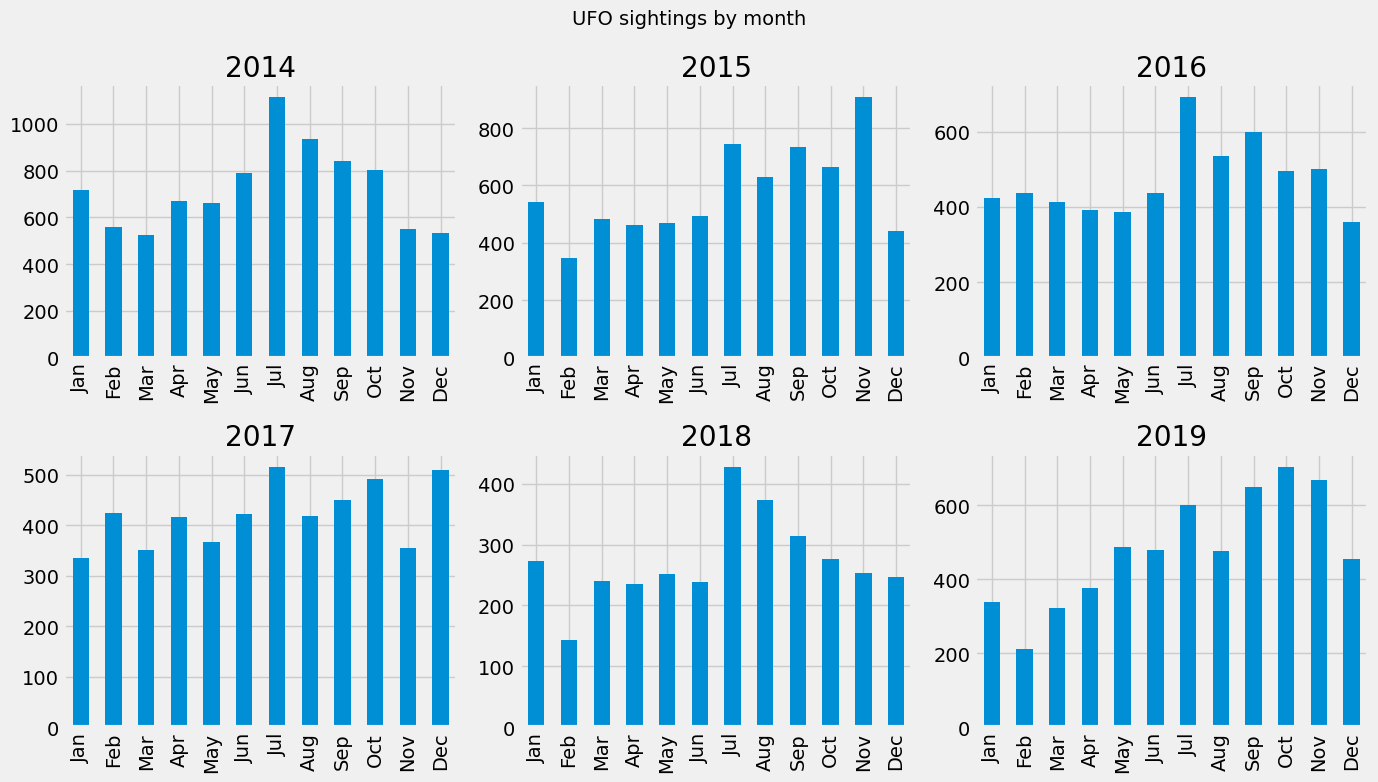

In [187]:
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
          7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

fig, axs = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle("UFO sightings by month", fontsize=14)
fig.tight_layout(pad=2)

ufos[ufos.year == 2014].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][0], title="2014")
ufos[ufos.year == 2015].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][1], title="2015")
ufos[ufos.year == 2016].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][2], title="2016")
ufos[ufos.year == 2017].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][0], title="2017")
ufos[ufos.year == 2018].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][1], title="2018")
ufos[ufos.year == 2019].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][2], title="2019")

plt.tight_layout()
plt.savefig("./image/UFO_By_Month")